In [44]:
import gudhi
import wfdb 
from wfdb import processing
import numpy as np

import persistencecurves as pc

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

In [45]:
def quasi_attractorize(series, step):
    n = series.shape[0]

    z = []
    for i in range(n - step + 1):
        z.append(series[i:i + step].reshape(1, 3)[0])

    return np.array(z)

In [46]:
def plot_attractor(attractor):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter(xs=attractor[:, 0],
            ys=attractor[:, 1],
            zs=attractor[:, 2])
    plt.show()

In [47]:
def extract_numpy_from_diag(diagram):
    tuples = [x[1] for x in diagram]
    xs = np.array([d[0] for d in tuples])
    ys = np.array([d[1] for d in tuples])

    return np.array([xs, ys]).T

In [48]:
record = wfdb.rdrecord('data/arrhythmia/100', sampfrom-2000, sampto=3000)
annotation = wfdb.rdann('data/arrhythmia/100', 'atr', sampfrom=2000, sampto=3000)

resampled_signal, resampled_ann = processing.resample_singlechan(record.p_signal[:, 0], annotation, record.fs, 200)
# normalized_signal = processing.normalize_bound(resampled_signal, lb=np.min(resampled_signal), ub=np.max(resampled_signal))
# resampled_signal - normalized_signal

(1664, 3)

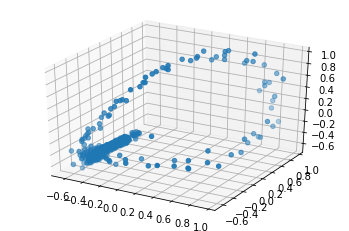

In [49]:
attractor = quasi_attractorize(resampled_signal, 3)
display(attractor.shape)
plot_attractor(attractor)

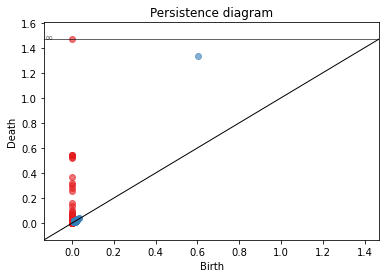

In [33]:
gudhi_complex = gudhi.RipsComplex(points=attractor)
# gudhi_complex = gudhi.AlphaComplex(points=attractor)
simplex_tree = gudhi_complex.create_simplex_tree(max_dimension=2)

diag = simplex_tree.persistence()
gudhi.plot_persistence_diagram(diag)

In [34]:
np_diag = extract_numpy_from_diag(diag)
pc_diagram = pc.Diagram(Dgm=np_diag)
# display(pc_diagram.Birth, pc_diagram.Death)

In [13]:
# min_attr = np.min(attractor)
# max_attr = np.max(attractor)
# display(min_attr, max_attr, attractor)
# betti_curve = pc_diagram.Betticurve(meshstart=0, meshstop=100, num_in_mesh=100)
# betti_curve

In [14]:
# plt.plot(betti_curve)